### 예제

1. test.csv 폴더에 있는 '유통+업종(백화점,+할인점,+슈퍼마켓,+편의점)+카드소비트렌드+데이터_1901_2109.csv' 파일을 로드
2. 각 컬럼의 이름은 ['기준년월', '업종', '성별', '연령대', '총이용건수', '총이용금액']
3. 기준년월을 시계열데이터로 변경
4. 성별 컬럼의 데이터를 1은 남자, 2는 여자로 변경, 9는 무관
5. 남녀 성별을 기준으로 년도별 건당 이용금액의 평균이 몇인지 출력

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../test_csv/유통+업종(백화점,+할인점,+슈퍼마켓,+편의점)+카드소비트렌드+데이터_1901_2109.csv", encoding = 'euc - kr')
df.head()

,crym,tco_btc_nm,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
0,201901,백화점,1,1,1,7.600000e+03
1,201901,백화점,1,10,379,1.945872e+07
2,201901,백화점,1,20,45173,4.747711e+09
3,201901,백화점,1,30,271858,2.791826e+10
4,201901,백화점,1,40,391109,3.791149e+10


In [3]:
df.columns = ['기준년월', '업종', '성별', '연령대', '총이용건수', '총이용금액']
df

,기준년월,업종,성별,연령대,총이용건수,총이용금액
0,201901,백화점,1,1,1,7.600000e+03
1,201901,백화점,1,10,379,1.945872e+07
2,201901,백화점,1,20,45173,4.747711e+09
3,201901,백화점,1,30,271858,2.791826e+10
4,201901,백화점,1,40,391109,3.791149e+10
...,...,...,...,...,...,...
2643,202109,편의점,2,50,844081,6.283353e+09
2644,202109,편의점,2,60,243768,1.997442e+09
2645,202109,편의점,2,70,40523,3.524203e+08
2646,202109,편의점,2,80,6349,5.333488e+07


In [4]:
# 기준년월 데이터를 시계열 변경
df['기준년월'] = pd.to_datetime(df['기준년월'], format = '%Y%m')

In [5]:
# 판다스에서 지수표현 없애기
pd.options.display.float_format = '{:.2f}'.format

In [6]:
# 인덱스를 기준년월로 변경
df.set_index('기준년월', inplace = True)

In [7]:
# 괴상한 데이터
df['연령대'].value_counts()

10    264
20    264
30    264
40    264
50    264
60    264
70    264
80    264
90    264
0     233
1      39
Name: 연령대, dtype: int64

In [8]:
# 성별 컬럼에서 1은 남자, 2는 여자, 9는 무관
def change(x):
    if x == 1:
        result = "남자"
    elif x == 2:
        result = "여자"
    elif x == 9:
        result = '무관'
    else:
        result = '-'
    return result

df['성별'].apply(change).value_counts()

여자    1336
남자    1312
Name: 성별, dtype: int64

In [9]:
df['성별'].apply(lambda x : '남자' if (x == 1) else ("여자" if (x == 2) else "무관"))

기준년월
2019-01-01    남자
2019-01-01    남자
2019-01-01    남자
2019-01-01    남자
2019-01-01    남자
              ..
2021-09-01    여자
2021-09-01    여자
2021-09-01    여자
2021-09-01    여자
2021-09-01    여자
Name: 성별, Length: 2648, dtype: object

In [10]:
df['성별'] = df['성별'].replace(
    {
        1 : '남자',
        2 : '여자',
        9 : '무관'
    }
)

In [11]:
df['성별'].value_counts()

여자    1336
남자    1312
Name: 성별, dtype: int64

In [12]:
# 연도 파생변수 생성
df['연도'] = df.index.strftime('%Y')

In [13]:
df.head()

,업종,성별,연령대,총이용건수,총이용금액,연도
기준년월,,,,,,
2019-01-01,백화점,남자,1,1,7600.00,2019
2019-01-01,백화점,남자,10,379,19458720.00,2019
2019-01-01,백화점,남자,20,45173,4747711001.00,2019
2019-01-01,백화점,남자,30,271858,27918261543.00,2019
2019-01-01,백화점,남자,40,391109,37911486656.00,2019


In [14]:
# 건당이용금액 파생변수 생성
# 총이용금액 / 총이용건수
df['건당이용금액'] = df['총이용금액'] /  df['총이용건수']

In [15]:
df.head()

,업종,성별,연령대,총이용건수,총이용금액,연도,건당이용금액
기준년월,,,,,,,
2019-01-01,백화점,남자,1,1,7600.00,2019,7600.00
2019-01-01,백화점,남자,10,379,19458720.00,2019,51342.27
2019-01-01,백화점,남자,20,45173,4747711001.00,2019,105100.64
2019-01-01,백화점,남자,30,271858,27918261543.00,2019,102694.28
2019-01-01,백화점,남자,40,391109,37911486656.00,2019,96933.30


In [16]:
import platform

In [17]:
import matplotlib.pyplot as plt

In [18]:
# 그래프에서 한글 깨짐 방지
if platform.system() == "Darwin":    # MAC인 경우
    plt.rc('font', family = 'AppleGothic')
else:
    plt.rc('font', family = 'Malgun Gothic')

<AxesSubplot:xlabel='연도,성별'>

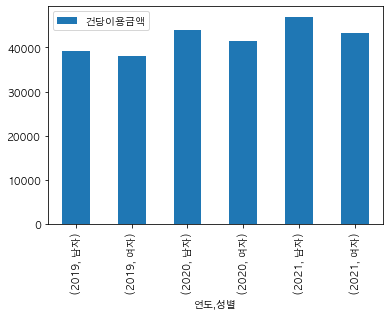

In [19]:
(df[['연도', '성별', '건당이용금액']].groupby(['연도', '성별']).mean()).plot.bar()

In [20]:
pivot = pd.pivot_table(
    df,
    index = '연도',
    columns = '성별',
    values = '건당이용금액',
    aggfunc = 'mean'
)

<AxesSubplot:xlabel='연도'>

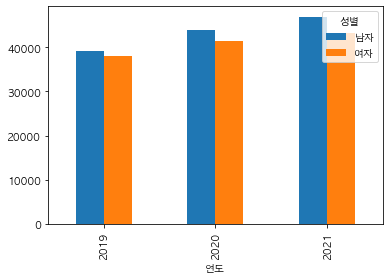

In [21]:
pivot.plot.bar()

### 온라인 카드 매출과 오프라인 카드 매출을 월별로 비교
1. 오프라인 데이터 df를 월별로 그룹화 총이용금액의 합계
    - 인덱스는 기준년월을 시계열로 변경한 데이터로 설정
2. 온라인 데이터 df_online도 월별로 그룹화 총이용금액의 합계
    - 인덱스는 기준년월을 시계열로 변경한 데이터로 변경

In [22]:
df.head()

,업종,성별,연령대,총이용건수,총이용금액,연도,건당이용금액
기준년월,,,,,,,
2019-01-01,백화점,남자,1,1,7600.00,2019,7600.00
2019-01-01,백화점,남자,10,379,19458720.00,2019,51342.27
2019-01-01,백화점,남자,20,45173,4747711001.00,2019,105100.64
2019-01-01,백화점,남자,30,271858,27918261543.00,2019,102694.28
2019-01-01,백화점,남자,40,391109,37911486656.00,2019,96933.30


In [23]:
group_data = df.groupby(df.index).sum()['총이용금액']

In [24]:
df_online = pd.read_csv('../test_csv/온라인+카드소비트렌드+데이터_1901_2109.csv')

In [25]:
df_online.head()

,crym,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
0,201901,1,1,1,110685
1,201901,1,10,2333,98108225
2,201901,1,20,272915,13854081656
3,201901,1,30,1320227,82946127640
4,201901,1,40,1372052,95550848337


In [26]:
# 컬럼의 이름을 변경
df_online.columns = ['기준년월', '성별', '연령대', '총이용건수', '총이용금액']

In [27]:
# 기준년월을 시계열로 변경하고 인덱스로 설정
df_online['기준년월'] = pd.to_datetime(df_online['기준년월'], format = '%Y%m')

In [28]:
df_online.set_index('기준년월', inplace = True)

In [29]:
df_online

,성별,연령대,총이용건수,총이용금액
기준년월,,,,
2019-01-01,1,1,1,110685
2019-01-01,1,10,2333,98108225
2019-01-01,1,20,272915,13854081656
2019-01-01,1,30,1320227,82946127640
2019-01-01,1,40,1372052,95550848337
...,...,...,...,...
2021-09-01,2,50,3237324,181360535814
2021-09-01,2,60,1019719,70026626874
2021-09-01,2,70,159261,13091029631


In [30]:
# 그룹화
group_data2 = df_online.groupby('기준년월').sum()['총이용금액']

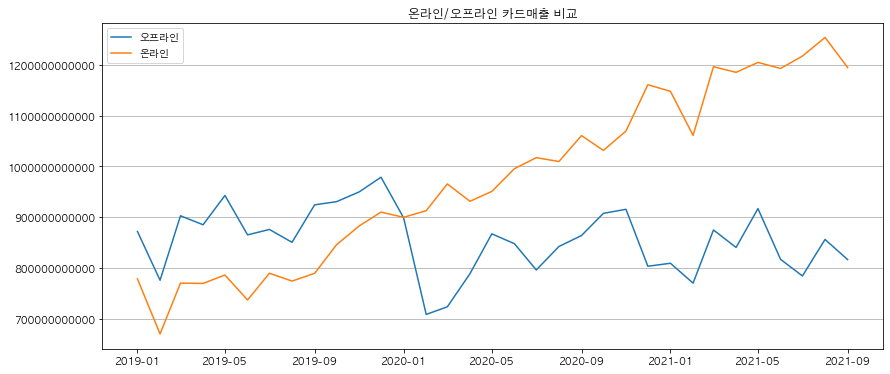

In [31]:
# 그래프로 시각화

# 그래프의 사이즈 변경
plt.figure(figsize = (14, 6))

# gird 추가
plt.grid(True, axis = 'y')
# true의 

# 지수 표현 제거
plt.ticklabel_format(axis = 'y', style = 'plain')

plt.plot(group_data, label = '오프라인')
plt.plot(group_data2, label = '온라인')
plt.title('온라인/오프라인 카드매출 비교')
plt.legend()
plt.show()

In [32]:
df

,업종,성별,연령대,총이용건수,총이용금액,연도,건당이용금액
기준년월,,,,,,,
2019-01-01,백화점,남자,1,1,7600.00,2019,7600.00
2019-01-01,백화점,남자,10,379,19458720.00,2019,51342.27
2019-01-01,백화점,남자,20,45173,4747711001.00,2019,105100.64
2019-01-01,백화점,남자,30,271858,27918261543.00,2019,102694.28
2019-01-01,백화점,남자,40,391109,37911486656.00,2019,96933.30
...,...,...,...,...,...,...,...
2021-09-01,편의점,여자,50,844081,6283353303.00,2021,7444.02
2021-09-01,편의점,여자,60,243768,1997441975.00,2021,8194.03
2021-09-01,편의점,여자,70,40523,352420260.00,2021,8696.80


In [33]:
df_online['업종'] = '온라인'

In [34]:
df_online

,성별,연령대,총이용건수,총이용금액,업종
기준년월,,,,,
2019-01-01,1,1,1,110685,온라인
2019-01-01,1,10,2333,98108225,온라인
2019-01-01,1,20,272915,13854081656,온라인
2019-01-01,1,30,1320227,82946127640,온라인
2019-01-01,1,40,1372052,95550848337,온라인
...,...,...,...,...,...
2021-09-01,2,50,3237324,181360535814,온라인
2021-09-01,2,60,1019719,70026626874,온라인
2021-09-01,2,70,159261,13091029631,온라인


In [35]:
total_df = pd.concat([df, df_online], axis = 'rows')

In [36]:
total_df['업종'].value_counts()

편의점     667
백화점     664
슈퍼마켓    663
할인점     654
온라인     651
Name: 업종, dtype: int64